In [17]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
sns.set()

            1-Year  5-Year  10-Year  20-Year  30-Year
2024-07-25    4.83    4.13     4.27     4.59     4.50
2024-07-26    4.79    4.06     4.20     4.53     4.45
2024-07-29    4.79    4.05     4.17     4.51     4.42
2024-07-30    4.78    4.03     4.15     4.50     4.40
2024-07-31    4.73    3.97     4.09     4.44     4.35


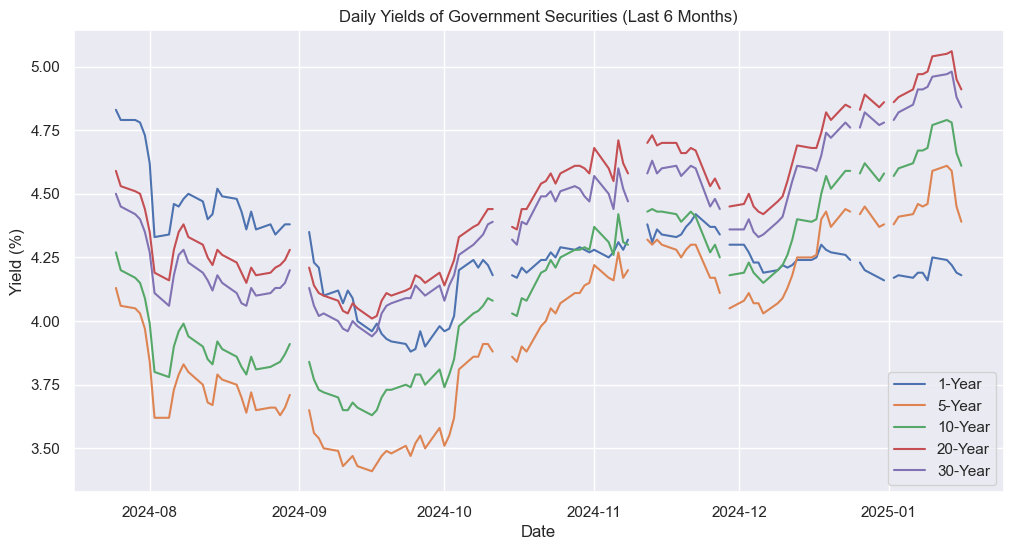

In [19]:
# Define the series IDs for the government securities
series_ids = {
    '1-Year': 'DGS1',
    '5-Year': 'DGS5',
    '10-Year': 'DGS10',
    '20-Year': 'DGS20',
    '30-Year': 'DGS30'
}

# Define the date range (last 6 months)
end_date = datetime.today()
start_date = end_date - timedelta(days=180)

# Fetch data for each series
dataframes = {}
for name, series_id in series_ids.items():
    data = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
    dataframes[name] = data

# Combine into a single DataFrame
df = pd.DataFrame(dataframes)

# Display the first few rows
print(df.head())

# Save the data to a CSV file
df.to_csv('government_securities_yields.csv')

# Plot the data
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.title('Daily Yields of Government Securities (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2024-07-25 to 2025-01-16
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1-Year   120 non-null    float64
 1   5-Year   120 non-null    float64
 2   10-Year  120 non-null    float64
 3   20-Year  120 non-null    float64
 4   30-Year  120 non-null    float64
dtypes: float64(5)
memory usage: 5.9 KB


In [28]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2024-07-25 to 2025-01-16
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1-Year   120 non-null    float64
 1   5-Year   120 non-null    float64
 2   10-Year  120 non-null    float64
 3   20-Year  120 non-null    float64
 4   30-Year  120 non-null    float64
dtypes: float64(5)
memory usage: 5.6 KB


In [30]:
# Calculate covariance matrix for US Treasury yields in the dataset
covariance_matrix = df.cov()
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
           1-Year    5-Year   10-Year   20-Year   30-Year
1-Year   0.033608  0.016370  0.011094  0.009786  0.007484
5-Year   0.016370  0.111443  0.104958  0.090315  0.088808
10-Year  0.011094  0.104958  0.100199  0.086723  0.085817
20-Year  0.009786  0.090315  0.086723  0.075677  0.074988
30-Year  0.007484  0.088808  0.085817  0.074988  0.074678


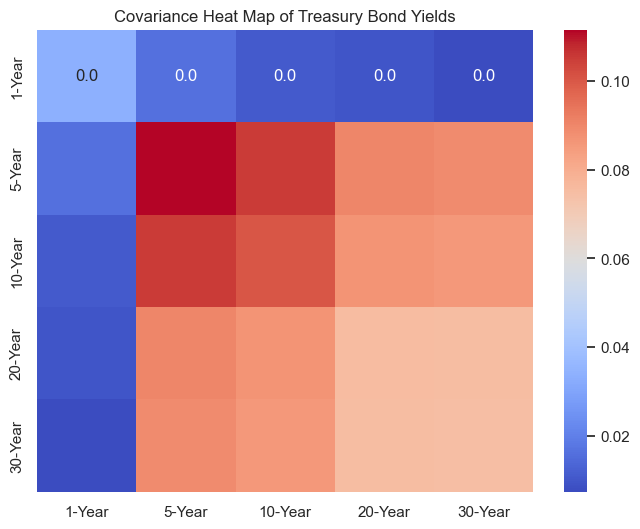

In [32]:
#Make a heatmap for covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Covariance Heat Map of Treasury Bond Yields')
plt.show()

In [34]:
# Calculate correlation matrix for US Treasury yields in the dataset
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           1-Year    5-Year   10-Year   20-Year   30-Year
1-Year   1.000000  0.267490  0.191182  0.194037  0.149396
5-Year   0.267490  1.000000  0.993242  0.983452  0.973484
10-Year  0.191182  0.993242  1.000000  0.995910  0.992081
20-Year  0.194037  0.983452  0.995910  1.000000  0.997501
30-Year  0.149396  0.973484  0.992081  0.997501  1.000000


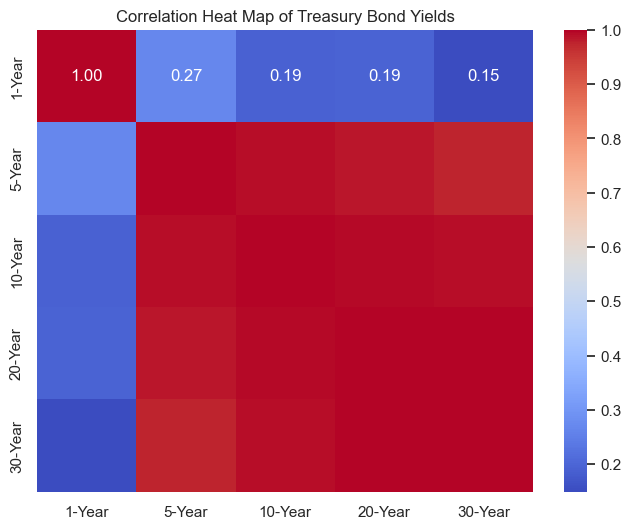

In [36]:
# Make a heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heat Map of Treasury Bond Yields')
plt.show()

In [38]:
#Calculate means for all yields in the dataset
yield_means = df.mean()
print("Yield Means:")
print(yield_means)

Yield Means:
1-Year     4.263667
5-Year     3.972583
10-Year    4.141750
20-Year    4.469333
30-Year    4.390583
dtype: float64


In [40]:
#Calculate standard deviations for all yields in the dataset
yield_stds = df.std()
print("Yield Standard Deviations:")
print(yield_stds)

Yield Standard Deviations:
1-Year     0.183326
5-Year     0.333831
10-Year    0.316543
20-Year    0.275094
30-Year    0.273272
dtype: float64


In [42]:
# Now create a standardized US Treasury yield dataset
standardized_data = (df- yield_means) / yield_stds
print("Standardized Yield (first 5 rows):")
print(standardized_data.head())

Standardized Yield (first 5 rows):
              1-Year    5-Year   10-Year   20-Year   30-Year
2024-07-25  3.089220  0.471547  0.405158  0.438637  0.400394
2024-07-26  2.871030  0.261859  0.184019  0.220530  0.217427
2024-07-29  2.871030  0.231904  0.089245  0.147828  0.107646
2024-07-30  2.816482  0.171993  0.026063  0.111477  0.034459
2024-07-31  2.543743 -0.007738 -0.163485 -0.106630 -0.148509


In [44]:
import numpy as np
from numpy import linalg as LA

In [46]:
# Calculate covariance matrix of the standardized dataset
std_data_cov = standardized_data.cov()

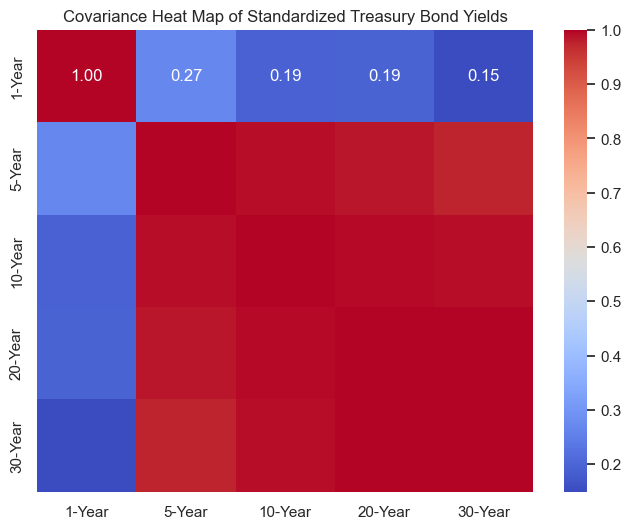

In [48]:
# Draw a heatmap of the covariance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(std_data_cov, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Covariance Heat Map of Standardized Treasury Bond Yields')
plt.show()

In [50]:
# Calculate eigenvectors and eigenvalues of the covariance matrix of standardized yield dataset
eigenvalues, eigenvectors = LA.eig(std_data_cov)
eigenvalues

array([4.02110670e+00, 9.54577173e-01, 2.28543890e-02, 4.62378689e-04,
       9.99360730e-04])

In [52]:
eigenvectors

array([[-0.13162732, -0.98713449, -0.08299361, -0.02732446,  0.02460035],
       [-0.49566996, -0.00691045,  0.72174213,  0.48139097,  0.04018164],
       [-0.49699459,  0.07587972,  0.20250242, -0.8268092 ,  0.15039269],
       [-0.4965457 ,  0.07366801, -0.34759817,  0.07672527, -0.78822848],
       [-0.49338047,  0.11972065, -0.55710738,  0.27931324,  0.59485978]])

In [54]:
# Transform standardized data with Loadings
principal_components = standardized_data.dot(eigenvectors)
principal_components.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5"]
principal_components.head()

,PC_1,PC_2,PC_3,PC_4,PC_5
2024-07-25,-1.257069,-2.941742,-0.209537,-0.046912,0.048308
2024-07-26,-0.815936,-2.779662,-0.209804,-0.026891,0.064335
2024-07-29,-0.663722,-2.805145,-0.164185,0.000807,0.040880
2024-07-30,-0.541286,-2.767120,-0.162284,0.002466,0.012746
2024-07-31,-0.123521,-2.549003,-0.130006,0.012278,0.033386


In [58]:
# Put data into a DataFrame
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,6))

# Work out explained proportion
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,4.021107,80.42%
2,0.954577,19.09%
3,0.022854,0.46%
4,0.000462,0.01%
5,0.000999,0.02%


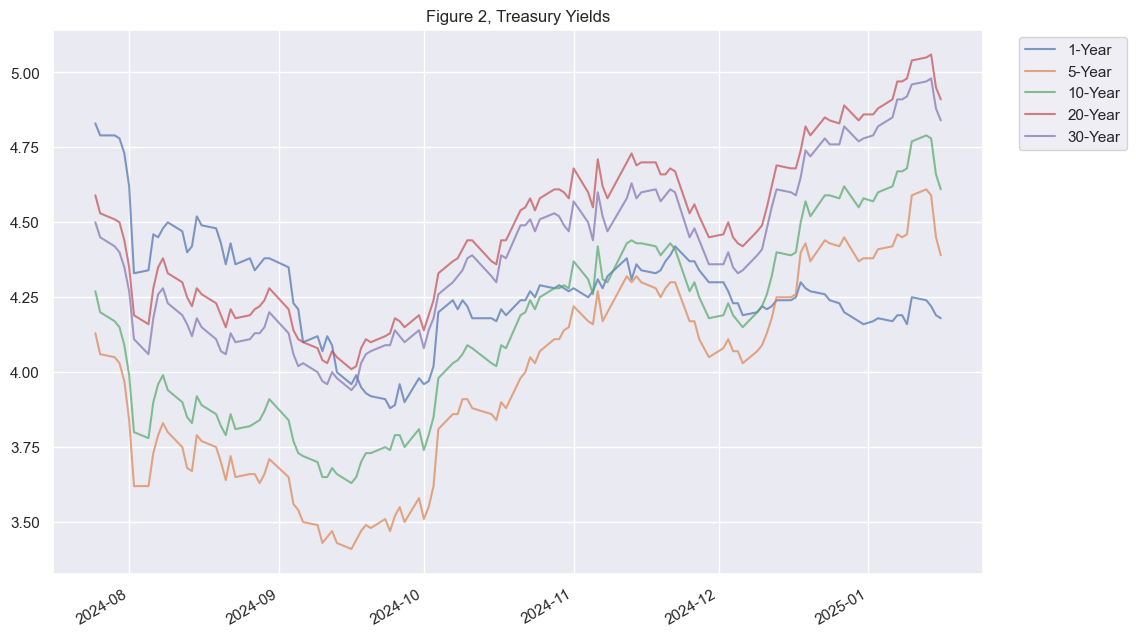

In [60]:
# Treasury Yield Curve
df.plot(figsize=(12, 8), title='Figure 2, Treasury Yields', alpha=0.7) # Plot the yields
plt.legend(bbox_to_anchor=(1.03, 1))
plt.show()

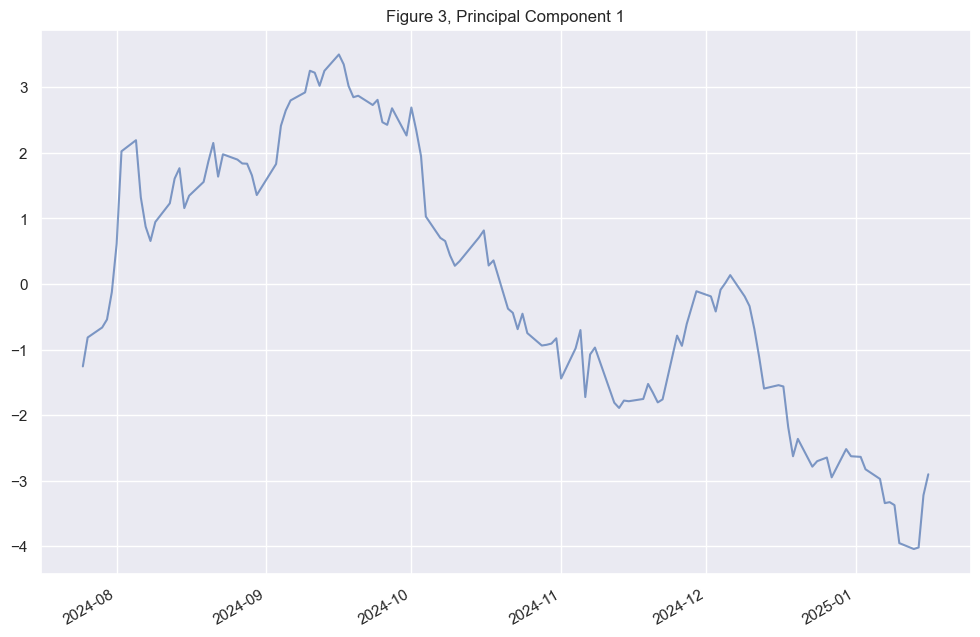

In [62]:
# Plot PC_1
principal_components["PC_1"].plot(figsize=(12, 8), title='Figure 3, Principal Component 1', alpha=0.7)
plt.show()

In [66]:
#Calculate slope (difference) of 2-year Treasury yield and 10-year Treasury yield
df_s = pd.DataFrame(data = standardized_data)
df_s = df_s[["1-Year","10-Year"]]
df_s["Tilt"] = df_s["1-Year"] - df_s["10-Year"]
df_s.head()

,1-Year,10-Year,Tilt
2024-07-25,3.089220,0.405158,2.684062
2024-07-26,2.871030,0.184019,2.687010
2024-07-29,2.871030,0.089245,2.781784
2024-07-30,2.816482,0.026063,2.790419
2024-07-31,2.543743,-0.163485,2.707228


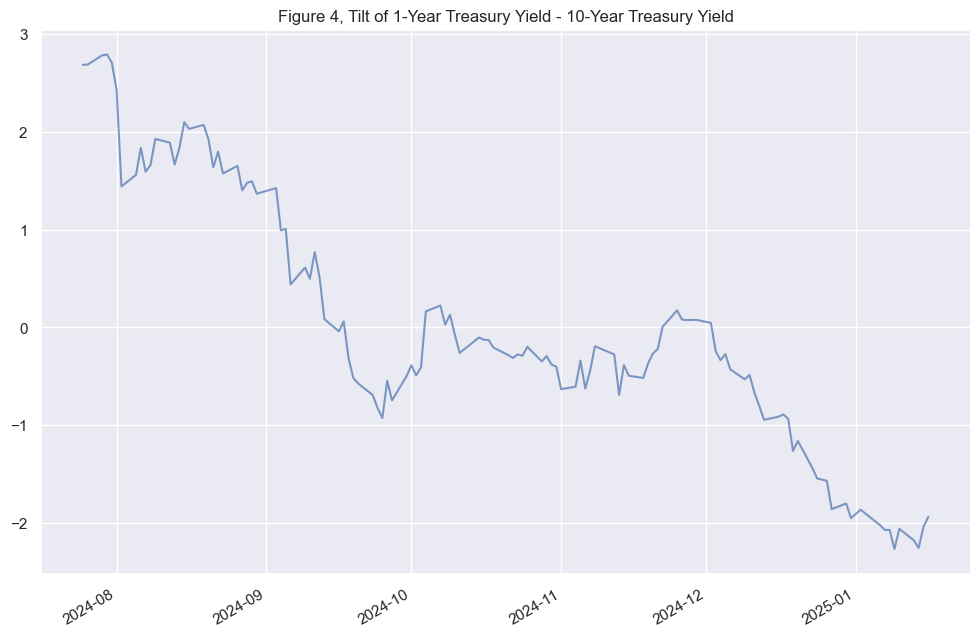

In [68]:
# Draw the graph of Slope of 2-Year Treasury Yield - 10-Year Treasury Yield
df_s["Tilt"].plot(figsize=(12, 8), title='Figure 4, Tilt of 1-Year Treasury Yield - 10-Year Treasury Yield', alpha=0.7) # Plot the yields difference
plt.show()

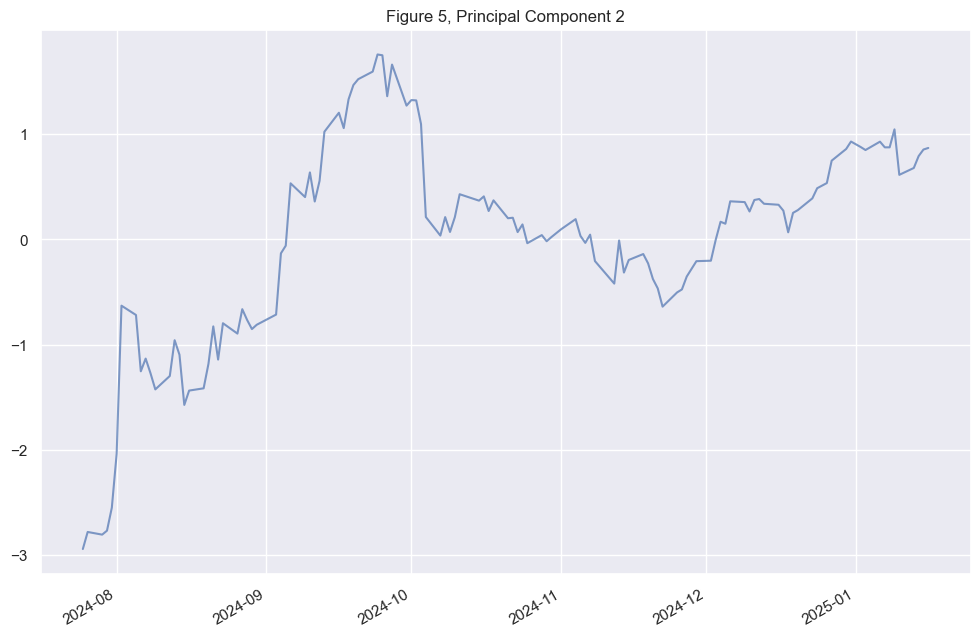

In [70]:
# Draw the graph for PC_2
principal_components["PC_2"].plot(figsize=(12, 8), title='Figure 5, Principal Component 2', alpha=0.7) # Plot the yields
plt.show()

In [72]:
np.corrcoef(principal_components["PC_2"], df_s["Tilt"])

array([[ 1.       , -0.8165902],
       [-0.8165902,  1.       ]])

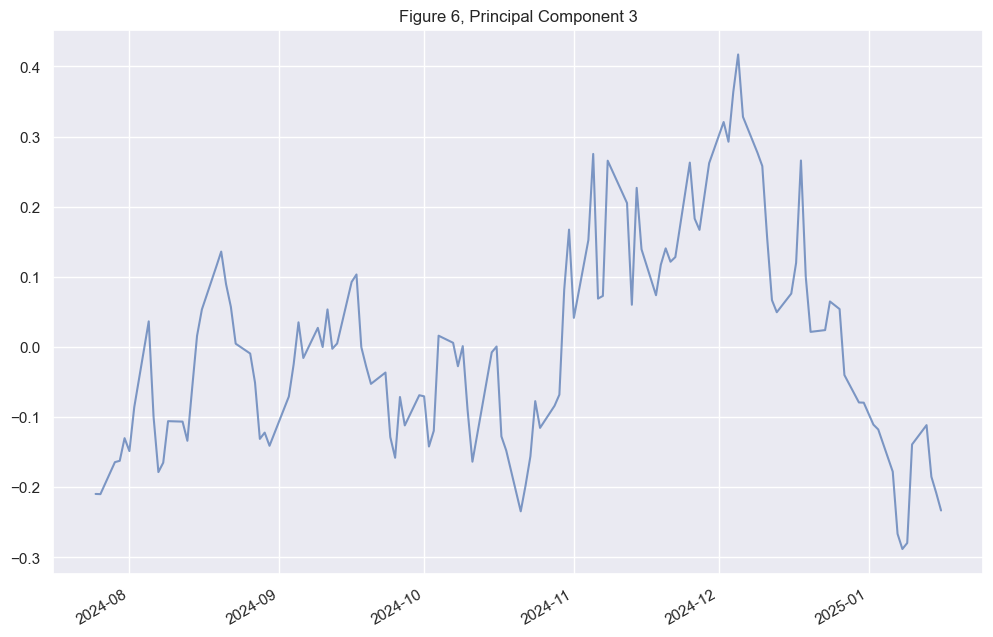

In [74]:
# Draw the graph for PC_3
principal_components["PC_3"].plot(figsize=(12, 8), title='Figure 6, Principal Component 3', alpha=0.7) # Plot the yields
plt.show()

In [104]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [106]:
# Part f: Compute daily yield changes
yield_changes = df.diff().dropna()

# Part g: Re-run PCA on yield changes
scaler = StandardScaler()
yield_changes_scaled = scaler.fit_transform(yield_changes)
pca_real = PCA()
pca_real.fit(yield_changes_scaled)

explained_variance_real = pca_real.explained_variance_ratio_



Explained Variance Ratio for Real Data:
Component 1: 86.14%
Component 2: 11.81%
Component 3: 1.61%
Component 4: 0.25%
Component 5: 0.19%


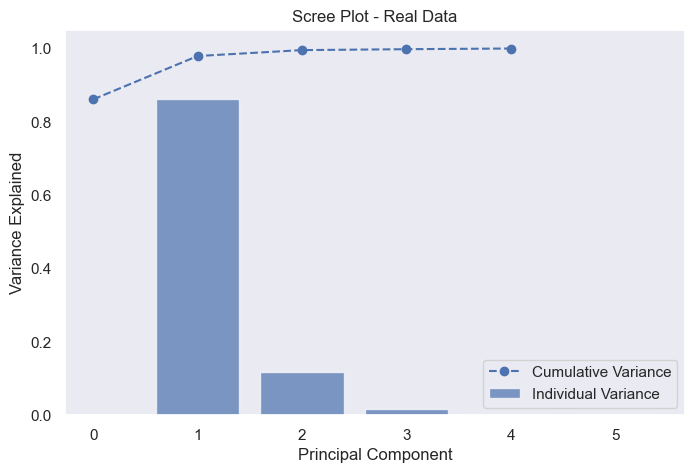

In [109]:
print("\nExplained Variance Ratio for Real Data:")
for i, var in enumerate(explained_variance_real):
    print(f"Component {i+1}: {var:.2%}")

# Part i: Scree plot for real data
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_real), marker='o', linestyle='--', label='Cumulative Variance')
plt.bar(range(1, len(explained_variance_real)+1), explained_variance_real, alpha=0.7, label='Individual Variance')
plt.title('Scree Plot - Real Data')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid()
plt.show()